In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl

%matplotlib inline

In [3]:
[metadata] = pickle.load(open("metadata_cluster.pickle", 'rb'))
metadata = metadata[~metadata.Celltype.isin(["CPU", "Others"])]
all_cells = metadata.index.tolist()
metadata['Brain_id'] = ['Brain_'+i.split("_")[0] for i in all_cells]
metadata['SWC'] = ['../Data/swc/mapped/Data_for_analysis/swc/Whole/'+i+'.swc' for i in all_cells]

df = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_09122019.284_cells.xlsx", index_col=[0])
region_list = pd.read_excel("../Subjective_celltype/tracking_table_QW_hz_LjL_09122019.284_cells.xlsx", sheet_name=1, header=None)[2].tolist()

# metadata = ns.features['soma_features'].region.copy()
metadata['Celltype'] = df.loc[metadata.index, "Confirmed"]
# # metadata['Celltype_note'] = df.loc[metadata.index, "Lijuan Note"]
# # metadata.loc[metadata["Celltype_note"]=="CPU", "Celltype"] = "CPU"
metadata.fillna("Others", inplace=True)
metadata.loc[metadata.Celltype.isin(["TH", "VPM/VPL"]), "Celltype"] = "TH_Uncertain"
metadata.loc[~metadata.Celltype.isin(["Others", "TH_Uncertain"]+region_list), "Celltype"] = "Others"
print(metadata.Celltype.value_counts())
# metadata
# pickle.dump([metadata], open("metadata.pickle", "wb"))


vpm_list = metadata[metadata.Celltype=="VPM"].index.tolist()
vpl_list = metadata[metadata.Celltype=="VPL"].index.tolist()
lgd_list = metadata[metadata.Celltype=="LGd"].index.tolist()
mg_list = metadata[metadata.Celltype=="MG"].index.tolist()


VPM    36
LGd    34
MG     21
VPL    19
LP      6
PO      3
MD      2
VAL     2
AM      2
RT      1
VM      1
PCN     1
IMD     1
Name: Celltype, dtype: int64


In [11]:
selected_abbreviation = nmt.bs.level.loc[nmt.bs.selected_regions, 'Abbrevation'].tolist()

[celltype_color_dict] = pickle.load(open('colors.pickle', 'rb'))
celltype_color_dict['RT'] = [0.9921568627450981, 0.6352941176470588, 0.24705882352941178]

cluster_color_dict = nmt.get_group_colors(metadata, "cluster")
cluster_color_dict['NA'] = [.5,.5,.5]
brain_color_dict = nmt.get_group_colors(metadata, "Brain_id")

## Select layer-wise regions

In [4]:
MAXSIZE = 100
my_cols = [i for i in range(MAXSIZE)]
mouseRead = pd.read_csv('/Users/pengxie/Documents/Research/python/neuro_morhpo_toolbox/neuro_morpho_toolbox/data/Mouse.csv', 
                        names=my_cols, engine='python',
                         skiprows=[0],
                         index_col=[1],
                         skipinitialspace=True)
mouseRead.drop([0, 3, 4, 5, 6, 7, 8], axis=1,inplace = True)

region_list = mouseRead.iloc[:,0].tolist()

extractDF = pd.DataFrame(index = mouseRead.index,columns = ['Acronym'],data = region_list)

index_list = []
judge_list = ['1','2','3','4','5','6','7','8','9']
for iter in extractDF.index:
    ele_iter = extractDF.loc[iter,'Acronym']
    if str(ele_iter[-1]) in judge_list:
        index_list.append(iter)
        #print(ele_iter)   
    if len(ele_iter)>1:
        if ele_iter[-2] in judge_list:
            index_list.append(iter)
            #print(ele_iter)   



import neuro_morpho_toolbox as nmt
isocortex_list = nmt.bs.get_all_child_id(315) # Only consider isocortex
index_list = [i for i in index_list if i in isocortex_list]
nmt.bs.selected_regions = index_list 
nmt.bs.dict_to_selected = {}
for cur_region in nmt.bs.selected_regions:
    child_ids = nmt.bs.get_all_child_id(cur_region)
    for i in child_ids:
        nmt.bs.dict_to_selected[i] = cur_region
        
selected_abbreviation = nmt.bs.level.loc[index_list, 'Abbrevation'].tolist()
print("number of selected_regions: %d" % len(selected_abbreviation))

/Users/pengxie/Documents/Research/python/neuro_morhpo_toolbox/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 1.02
Loading CCF brain structure data...
Loading time: 0.01


/Users/pengxie/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/pengxie/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


number of selected_regions: 314


In [5]:
ns = nmt.neuron_set('../Data/swc/mapped/Data_for_analysis/swc/Whole/')

Loading...
100 loaded: 3.5s
200 loaded: 4.2s
Finding soma locations...
Getting projection features...
Number of input neurons: 284
Number of input features: 628
All values are zeros for the following cells:
17545_00007
17545_00028
17545_00065
18457_00030
18457_00031
18457_00032
18457_00038
18457_00039
18457_00044
18457_00077
18457_00078
18457_00114
18457_00115
18457_00116
18457_00170
18457_00184
18465_00206
18465_00207
18465_00209
Getting metadata...


/Users/pengxie/Documents/Research/python/neuro_morhpo_toolbox/neuro_morpho_toolbox/neuron_features.py:177: RuntimeWarning:

invalid value encountered in true_divide



## summary plot

In [7]:
layers = ['1', '2/3', '4','5','6a','6b']
layer_dict = {}
for L in layers:
    layer_dict[L] = []
for i in selected_abbreviation:
    found = 0
    for L in layers:
        if i.endswith(L):
            found = 1
            layer_dict[L].append(i)
            break
    if not found:
        found = 0
#         print(i)

def sort_layer_df(df):
    tp = df.idxmax(axis=1)
    cell_list = []
    for L in layers:
        cell_list = cell_list + tp[tp==L].index.tolist()
    return df.loc[cell_list]
def layer_sum(df):
    layer_df = pd.DataFrame(0, index=df.index, columns=layers)
    for L in layers:
        cur_regions = [i for i in df.columns.tolist() if i.split('_')[-1] in layer_dict[L]]
        layer_df[L] = np.sum(df[cur_regions], axis=1).tolist()
    return sort_layer_df(layer_df)



## Length of axon in layers

In [8]:
projection_df = ns.features['projection_features'].raw_data.round(2)
projection_df = projection_df.round(2)
use_features = projection_df.columns[np.sum(projection_df>0)>=3]
projection_df = projection_df[use_features]
print("Projection features: %d" % (projection_df.shape[1]))

Projection features: 181


VPM 8
VPL 2
LP 5
LGd 10
MG 14


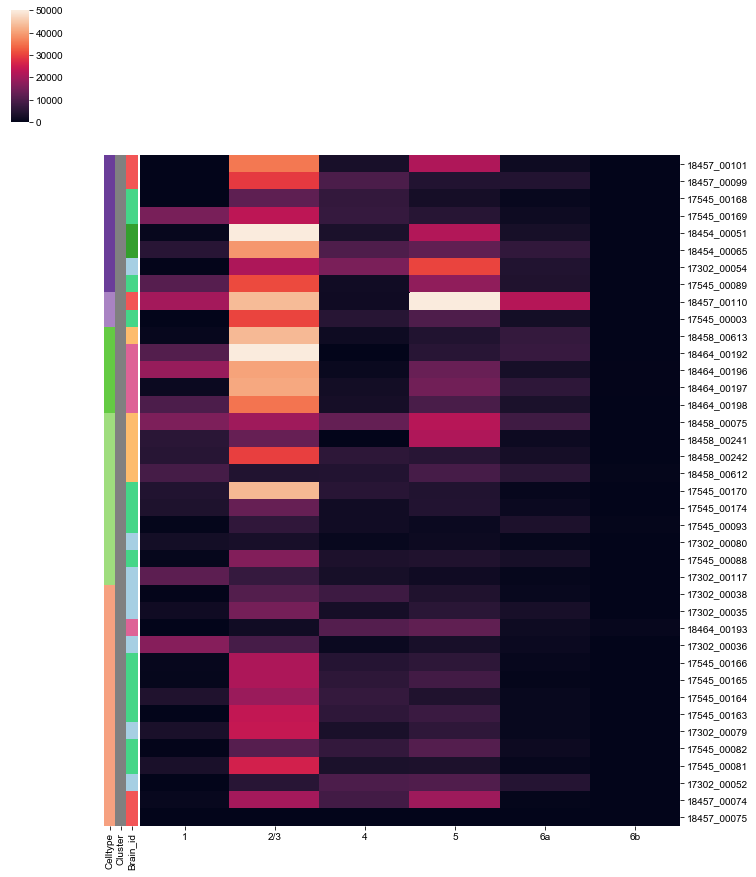

In [13]:
length_df = layer_sum(projection_df)

color_df = {'Celltype':[], 'Cluster':[], 'Brain_id':[]}
celltype_list = ['VPM',
                 'VPL', 'LP', 'LGd', 'MG'
                ]

sum_df = pd.DataFrame(columns=length_df.columns)
for cur_celltype in celltype_list:
    cur_list = metadata[((metadata.Celltype==cur_celltype) & (metadata.cluster=="NA"))].index.tolist()
    cur_df = length_df.loc[cur_list]
    sum_df = pd.concat([sum_df, cur_df], axis=0)
    color_df['Celltype'] = color_df['Celltype'] + [celltype_color_dict[cur_celltype]] * len(cur_list)
    color_df['Cluster'] = color_df['Cluster'] + [cluster_color_dict[i] for i in metadata.loc[cur_list, 'cluster'].tolist()]
    color_df['Brain_id'] = color_df['Brain_id'] + [brain_color_dict[i] for i in metadata.loc[cur_list, 'Brain_id'].tolist()]
    print(cur_celltype, len(cur_df))
color_df = pd.DataFrame(color_df, index=sum_df.index)
region_list = sorted(sum_df.columns.tolist())
sum_df = sum_df[region_list]

g = sns.clustermap(sum_df, row_colors=color_df, 
                   linecolor='white', 
                   col_cluster=False, row_cluster=False,
                   z_score=None, figsize=(12,15),
                   vmax=50000
                  )

# g.savefig('../Figure/Region_specificity.pdf')

VPM 28
VPL 17
LP 1
LGd 24
MG 7


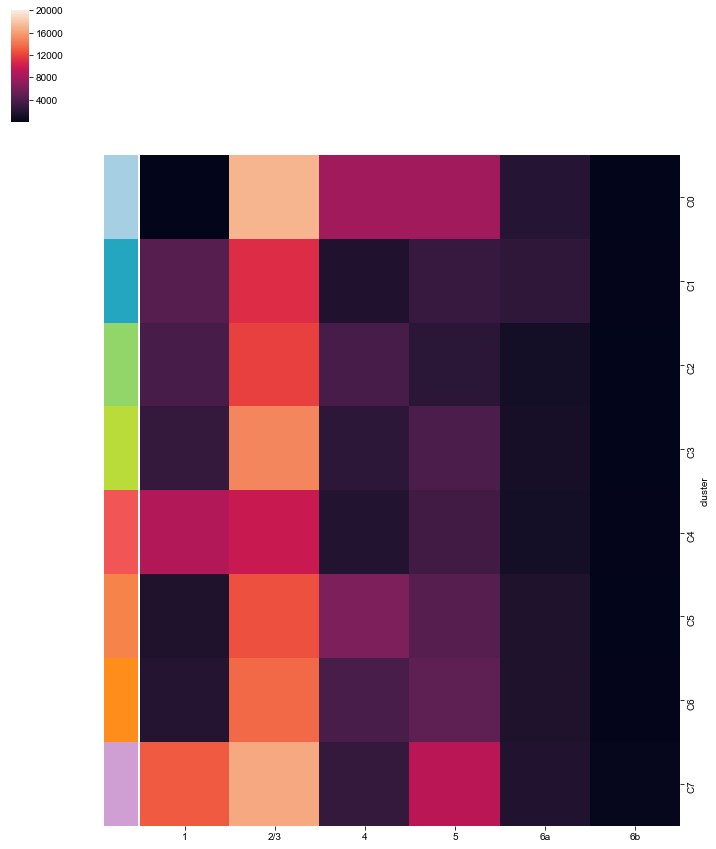

In [28]:
length_df = layer_sum(projection_df)

color_df = {'Celltype':[], 'Cluster':[], 'Brain_id':[]}
celltype_list = ['VPM',
                 'VPL', 'LP', 'LGd', 'MG'
                ]

sum_df = pd.DataFrame(columns=length_df.columns)
for cur_celltype in celltype_list:
    cur_list = metadata[((metadata.Celltype==cur_celltype) & (metadata.cluster!="NA"))].index.tolist()
    cur_df = length_df.loc[cur_list]
    sum_df = pd.concat([sum_df, cur_df], axis=0)
    color_df['Celltype'] = color_df['Celltype'] + [celltype_color_dict[cur_celltype]] * len(cur_list)
    color_df['Cluster'] = color_df['Cluster'] + [cluster_color_dict[i] for i in metadata.loc[cur_list, 'cluster'].tolist()]
    color_df['Brain_id'] = color_df['Brain_id'] + [brain_color_dict[i] for i in metadata.loc[cur_list, 'Brain_id'].tolist()]
    print(cur_celltype, len(cur_df))
color_df = pd.DataFrame(color_df, index=sum_df.index)
region_list = sorted(sum_df.columns.tolist())
sum_df = sum_df[region_list]



# g.savefig('../Figure/Region_specificity.pdf')

tp = pd.concat([sum_df, metadata[['Celltype', 'cluster']]], axis=1, join='inner').groupby('cluster').mean()
g = sns.clustermap(tp, row_colors=[cluster_color_dict[i] for i in tp.index.tolist()], 
                   linecolor='white', 
                   col_cluster=False, row_cluster=False,
                   z_score=None, figsize=(12,15),
                   vmax=20000
                  )

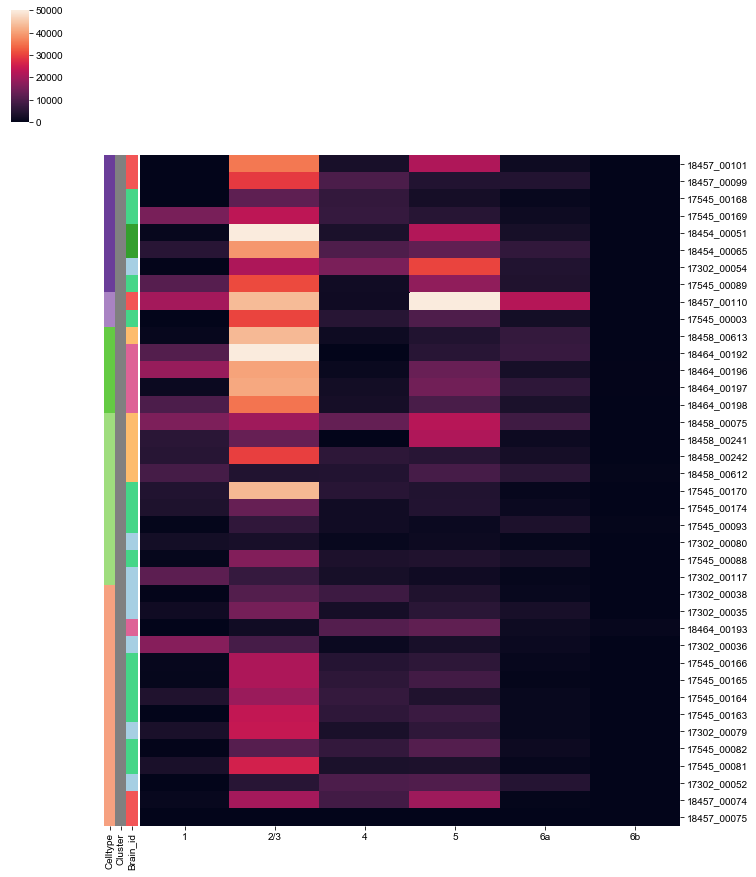

In [15]:
tp = pd.concat([sum_df, metadata[['Celltype', 'cluster']]], axis=1, join='inner').group_by('cluster')
g = sns.clustermap(tp[sum_df.columns], row_colors=color_df, 
                   linecolor='white', 
                   col_cluster=False, row_cluster=False,
                   z_score=None, figsize=(12,15),
                   vmax=50000
                  )

## Number of terminals

In [41]:
region_used = nmt.bs.selected_regions
region_dict = {}
for ct, cur_region in enumerate(region_used):
    child_ids = nmt.bs.get_all_child_id(cur_region)
    for i in child_ids:
        region_dict[i] = cur_region
        
midline = nmt.annotation.size['z']/ 2
def get_target_regions(neuron):
    # Get soma location
    assert (neuron.swc.loc[1, "type"] ==1), "Soma not found."
    tp = neuron.swc.loc[1].copy()
    soma = pd.DataFrame({"x": [np.int(tp.x / nmt.annotation.space['x'])],
                        "y": [np.int(tp.y / nmt.annotation.space['y'])],
                        "z": [np.int(tp.z / nmt.annotation.space['z'])],
                        "hemisphere":[1]},
                        index=[1]
                       )
    if soma.loc[1, 'z']>midline:
        soma.loc[1, 'hemisphere'] = 2
        
    # Get terminal regions
    tp = neuron.swc.copy()
    tp['n_children'] = [0]*len(tp)

    parent_count = tp.parent.value_counts().sort_index()
    parent_count = parent_count[parent_count.index>0]

    tp.loc[parent_count.index.tolist(), 'n_children'] = parent_count.tolist()
    tp = tp[((tp.type==2) & (tp.n_children==0))]

    terminals = pd.DataFrame({"x": np.array(np.array(tp.x) / nmt.annotation.space['x'], dtype="int32"),
                              "y": np.array(np.array(tp.y) / nmt.annotation.space['y'], dtype="int32"),
                              "z": np.array(np.array(tp.z) / nmt.annotation.space['z'], dtype="int32"),
                              "region": ["NA"]*len(tp),
                              "hemisphere": [1]*len(tp),
                              "type": tp.type
                       })

    terminals = terminals[((terminals.x >= 0) & (terminals.x < nmt.annotation.size['x']) &
             (terminals.y >= 0) & (terminals.y < nmt.annotation.size['y']) &
             (terminals.z >= 0) & (terminals.z < nmt.annotation.size['z'])
            )]
#     target_id = [region_dict[i] for i in nmt.annotation.array[terminals.x, terminals.y, terminals.z].tolist()]
    target_names = []
    for i in nmt.annotation.array[terminals.x, terminals.y, terminals.z].tolist():
        if not i in list(region_dict.keys()):
            target_names.append("NA")
        else:
            target_names.append(nmt.bs.level.loc[region_dict[i], "Abbrevation"])
    terminals["region"] = target_names
    terminals = terminals[terminals.region!="NA"]
    terminals.loc[terminals.z>midline, "hemisphere"] = 2
    for i in terminals.index.tolist():
        if terminals.loc[i, "hemisphere"] == soma.loc[1, 'hemisphere']:
            header = 'ipsi_'
        else:
            header = 'contra_'
        terminals.loc[i, 'region'] = header + terminals.loc[i, 'region']
        
    return terminals


In [74]:
terminal_df = pd.DataFrame(0, index = ns.names, 
                  columns=['ipsi_'+i for i in selected_abbreviation] + ['contra_'+i for i in selected_abbreviation]
                 )
for cur_name in ns.names:
    tp = get_target_regions(ns.neurons[cur_name])
    tp = tp[tp.type==2]['region'].value_counts()
    terminal_df.loc[cur_name, tp.index] = tp.tolist()

use_features = terminal_df.columns[np.sum(terminal_df>10)>=1]
terminal_df = terminal_df[use_features]

## Show summary plot

In [108]:
[celltype_color_dict] = pickle.load(open('colors.pickle', 'rb'))

In [165]:
col_color = []
sum_df = pd.DataFrame(columns=layers, dtype=np.int64)
celltype_list = ['VPM']
for cur_celltype in celltype_list:
    cur_list = metadata[metadata.Celltype==cur_celltype].index.tolist()
    cur_df = terminal_df.loc[cur_list]
    cur_sum_df = layer_sum(cur_df)
    sum_df = pd.concat([sum_df, cur_sum_df], axis=0)
    col_color = col_color + [celltype_color_dict[cur_celltype]] * len(cur_list)
    print(cur_celltype, len(cur_df))



VPM 34


In [212]:
metadata.loc['17545_00071']

Hemisphere                                                    1
Region                                                       PO
Celltype                                                     PO
Brain_id                                            Brain_17545
SWC           ../Data/swc/mapped/Data_for_analysis/swc/Whole...
cluster                                                      NA
Name: 17545_00071, dtype: object

In [211]:
sum_df.loc['17545_00071']

KeyError: '17545_00071'

VPM 34


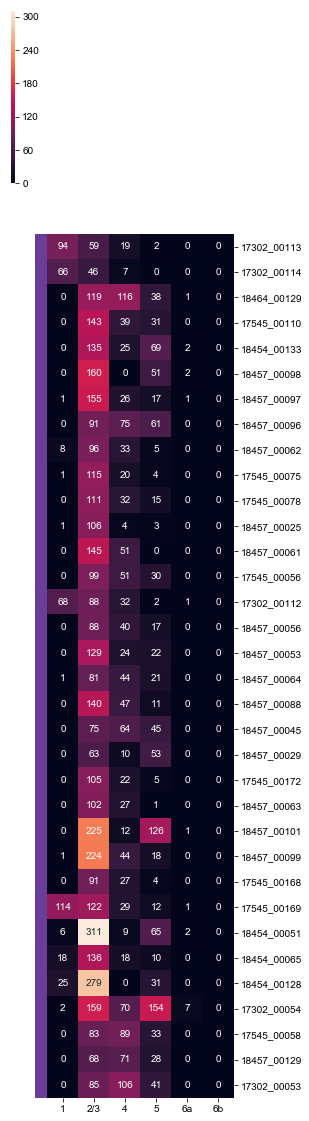

In [188]:
col_color = []
sum_df = pd.DataFrame(columns=layers, dtype=np.int64)
celltype_list = ['VPM']
for cur_celltype in celltype_list:
    cur_list = metadata[metadata.Celltype==cur_celltype].index.tolist()
    cur_df = terminal_df.loc[cur_list]
    cur_sum_df = layer_sum(cur_df)
    sum_df = pd.concat([sum_df, cur_sum_df], axis=0)
    col_color = col_color + [celltype_color_dict[cur_celltype]] * len(cur_list)
    print(cur_celltype, len(cur_df))



g = sns.clustermap(sum_df, linecolor='white', 
                   col_cluster=False, row_cluster=False,
                   row_colors=col_color, 
                   z_score=None, figsize=(4,20),
                   annot=True, fmt='d'
                  )


VPM 34
VPL 19
LP 6
LGd 34
MG 21


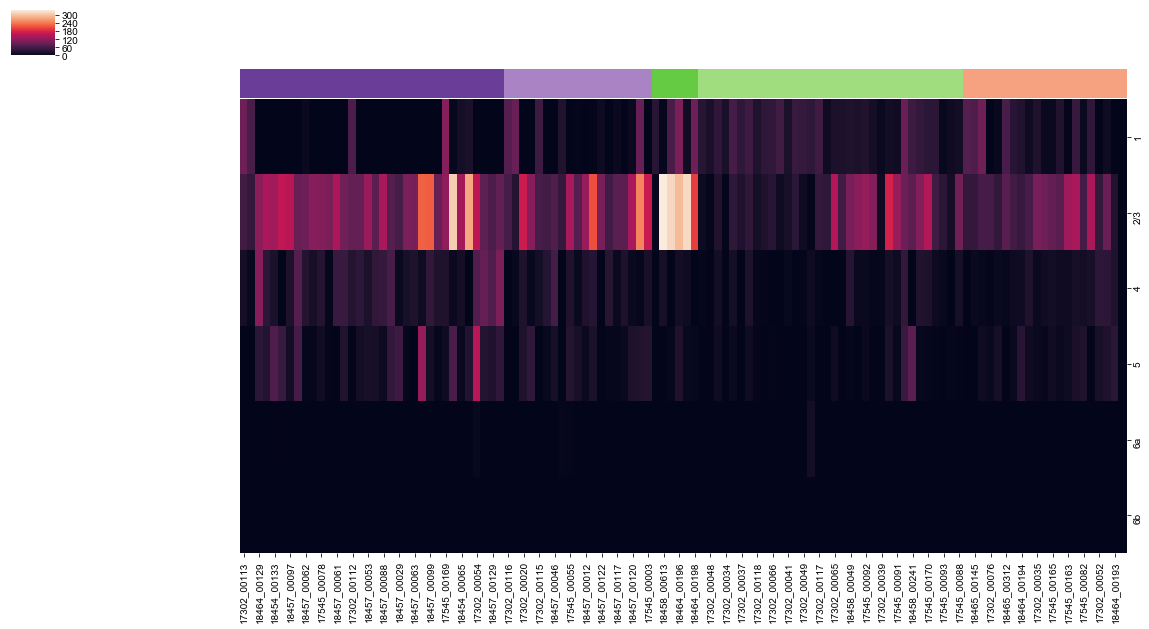

In [195]:
col_color = []
sum_df = pd.DataFrame(columns=layers, dtype=np.int64)
celltype_list = ['VPM', 'VPL', 'LP', 'LGd', 'MG']
for cur_celltype in celltype_list:
    cur_list = metadata[metadata.Celltype==cur_celltype].index.tolist()
    cur_df = terminal_df.loc[cur_list]
    cur_sum_df = layer_sum(cur_df)
    sum_df = pd.concat([sum_df, cur_sum_df], axis=0)
    col_color = col_color + [celltype_color_dict[cur_celltype]] * len(cur_list)
    print(cur_celltype, len(cur_df))
    
g = sns.clustermap(sum_df.transpose(), linecolor='white', 
                   col_cluster=False, row_cluster=False,
                   col_colors=col_color, 
                   z_score=None, figsize=(20,10),
                   
#                    standard_scale=1,
#                    annot=True, fmt='d'
                  )
g.savefig('../Figure/Layer_specificity.pdf')